In [0]:
!pip install opencv-contrib-python


In [0]:
import numpy as np
import argparse
import cv2
from skimage.color import rgb2gray
import time
from google.colab.patches import cv2_imshow
import os
import sys
from matplotlib import pyplot as plt
from google.colab import drive

%matplotlib inline

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


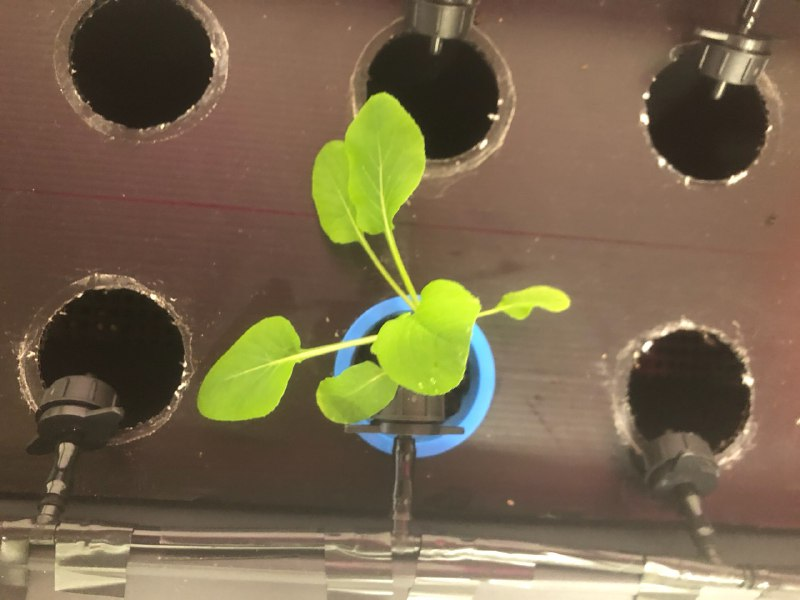

In [0]:
image1 = cv2.imread("/content/drive/My Drive/plants/ourplant/ourplant23.jpg", 1)

cv2_imshow(image1)

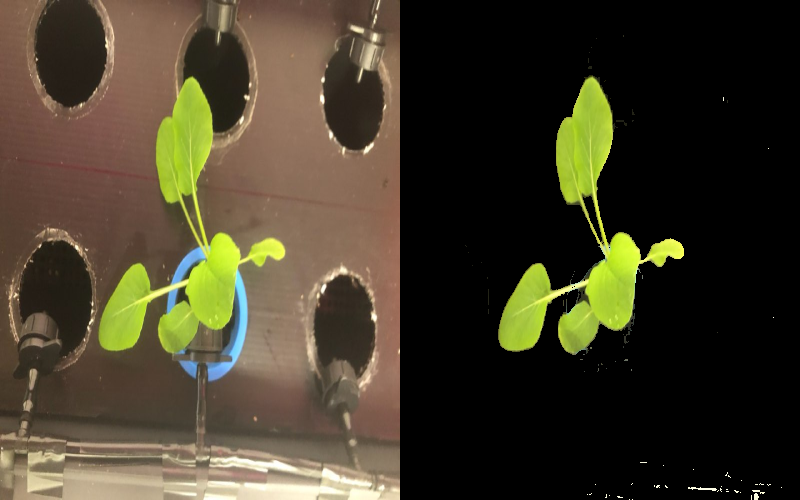

In [0]:
image = cv2.resize(cv2.imread("/content/drive/My Drive/plants/ourplant/ourplant23.jpg", 1), (400,500))
image1 = cv2.imread("/content/drive/My Drive/plants/easy1.jpg", 1)

# #Green Detection/

hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
lower_green = np.array([30,20,10])
upper_green = np.array([80,255,255])
mask = cv2.inRange(hsv, lower_green, upper_green)
output = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(np.hstack([image, output]))

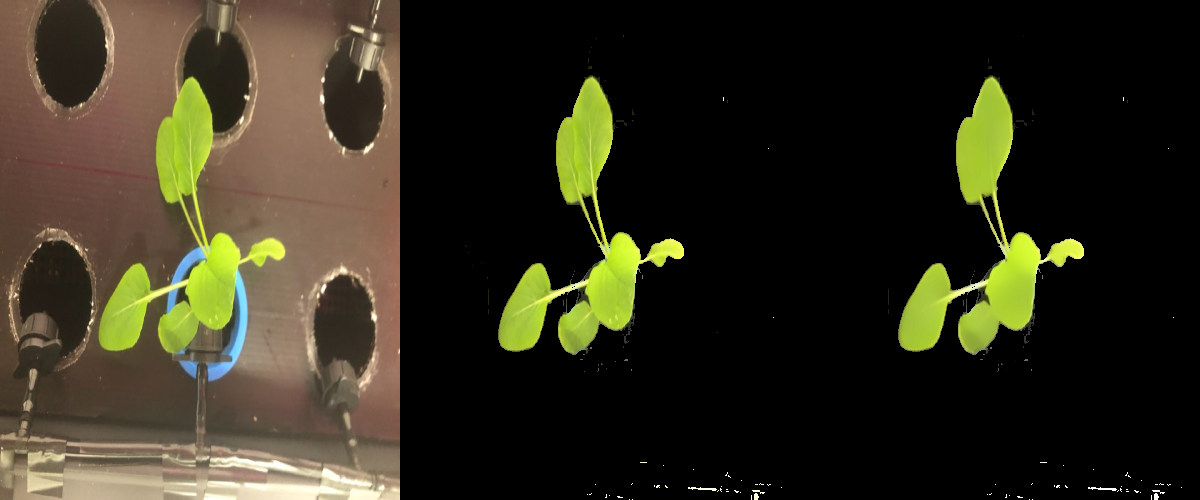

In [0]:
dst = cv2.fastNlMeansDenoisingColored(output, None, 10, 10, 7,21)
cv2_imshow(np.hstack([image, output, dst]))

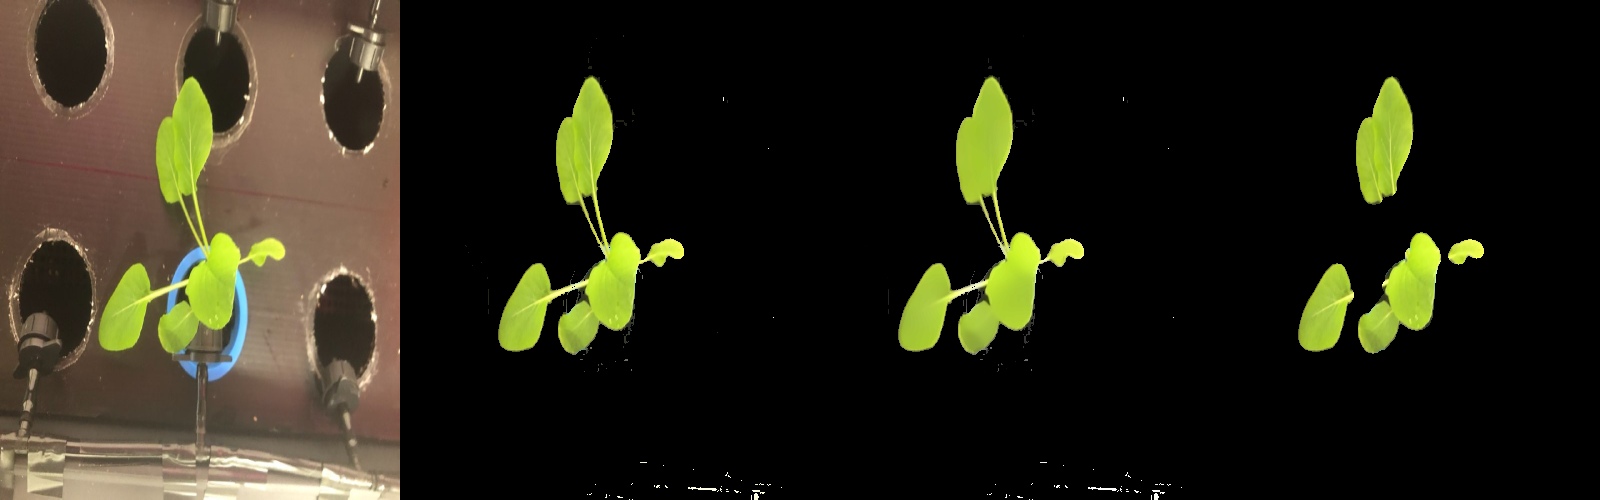

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
out = cv2.bitwise_and(image, image, mask=opened_mask)
cv2_imshow(np.hstack([image, output, dst, out]))

In [0]:
output = out

In [0]:
print(image.shape[0] * image.shape[1])
count = 0
for i in range(output.shape[0]):
  for j in range(output.shape[1]):
    if output[i][j][0] != 0:
      count += 1
print(count)
print("Density of green is: " + str(count/(image.shape[0] * image.shape[1])))

200000
14252
Density of green is: 0.07126


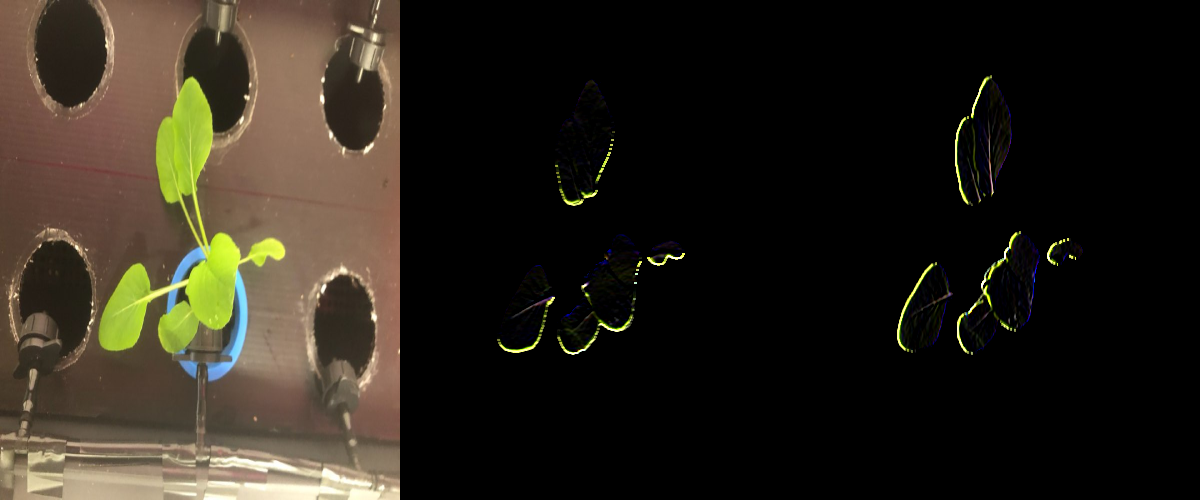

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [0]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
edgesPrewittx = cv2.filter2D(output, -1, kernelx)
edgesPrewitty = cv2.filter2D(output, -1, kernely)

for i in range(edgesPrewittx.shape[0]):
  for j in range(edgesPrewittx.shape[1]):
    if output[i][j][0] != 0:
      output[i][j][0] = 255
    if output[i][j][1] != 0:
      output[i][j][1] = 255
    if output[i][j][2] != 0:
      output[i][j][2] = 255

cv2_imshow(np.hstack([image, edgesPrewittx, edgesPrewitty]))

print(edgesPrewittx)

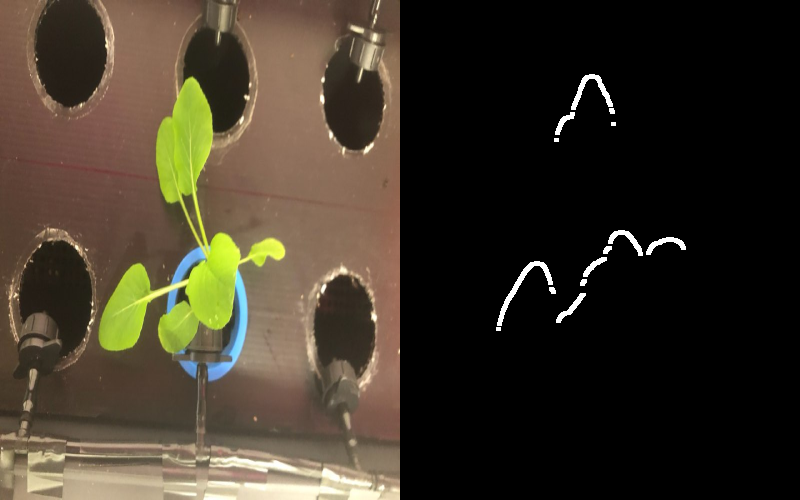

In [0]:
edgesSobelx = cv2.Sobel(output, cv2.CV_64F, 1, 0, ksize=5)
edgesSobely = cv2.Sobel(output, cv2.CV_64F, 0, 1, ksize=5)

for i in range(edgesSobely.shape[0]):
  for j in range(edgesSobely.shape[1]):
    if output[i][j][0] != 0:
      output[i][j][0] = 255
    if output[i][j][1] != 0:
      output[i][j][1] = 255
    if output[i][j][2] != 0:
      output[i][j][2] = 255

cv2_imshow(np.hstack([image, edgesSobely]))

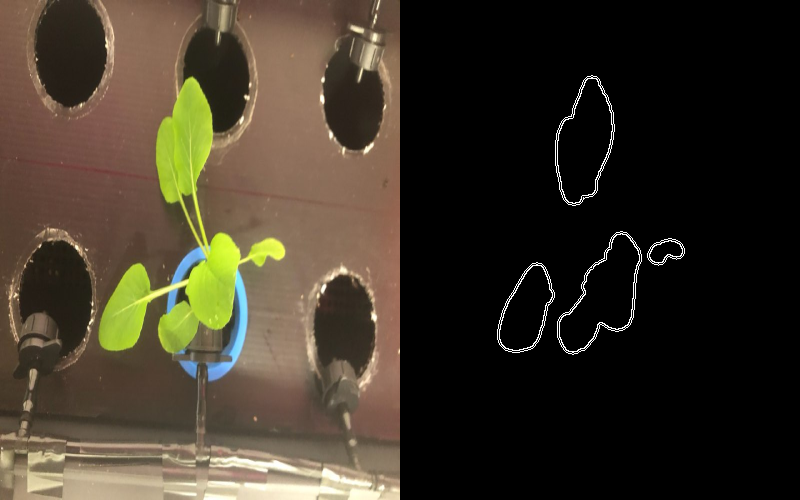

In [0]:

edgesLaplacian = cv2.Laplacian(output, cv2.CV_64F)
kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
edgesLaplacian = cv2.filter2D(edgesLaplacian, -1, kernel)
cv2_imshow(np.hstack([image, edgesLaplacian]))



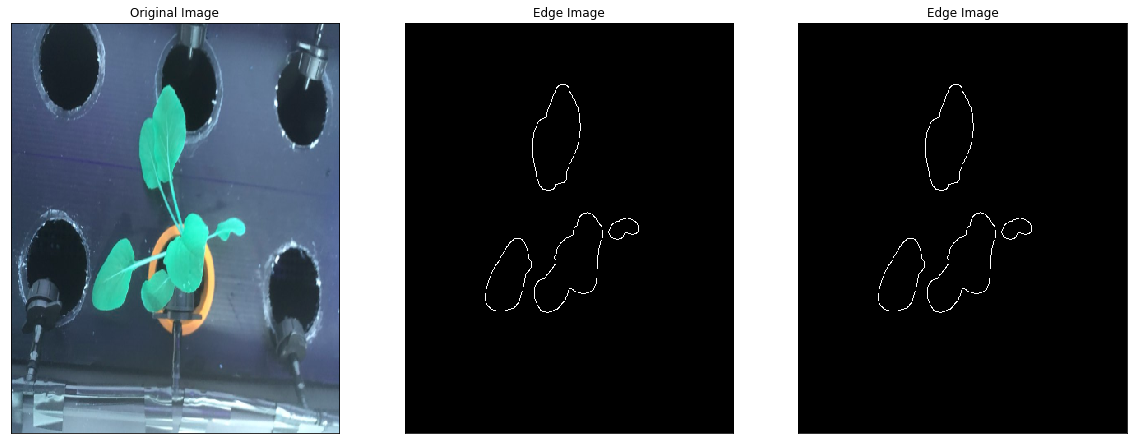

In [0]:

edges = cv2.Canny(output,0,300)
edges1 = cv2.Canny(output,40,300)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [0]:
cv2_imshow()

ValueError: ignored

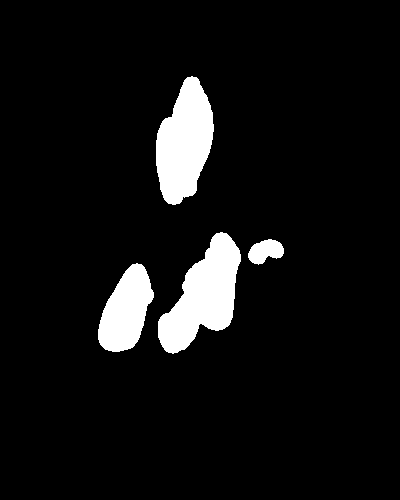

In [0]:
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

cv2_imshow(thresh)

In [0]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

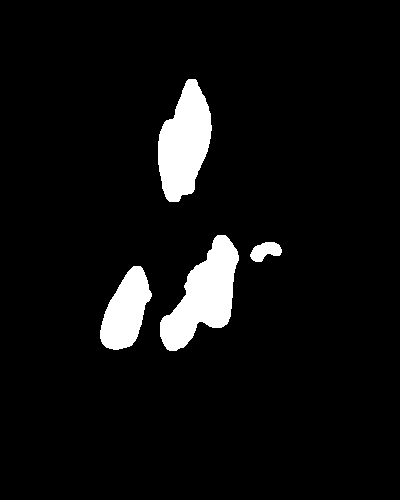

In [0]:
cv2_imshow(sure_fg)

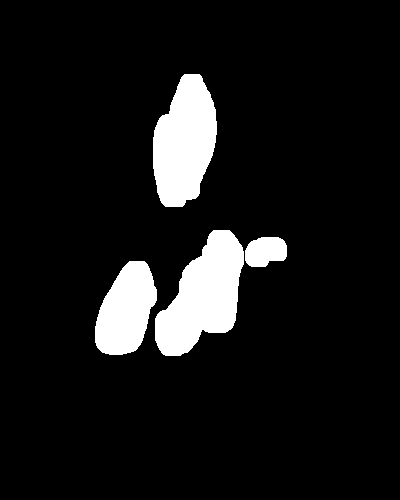

In [0]:
cv2_imshow(sure_bg)

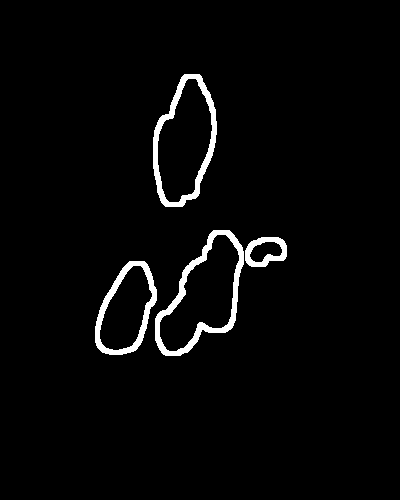

In [0]:
cv2_imshow(unknown)

In [0]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

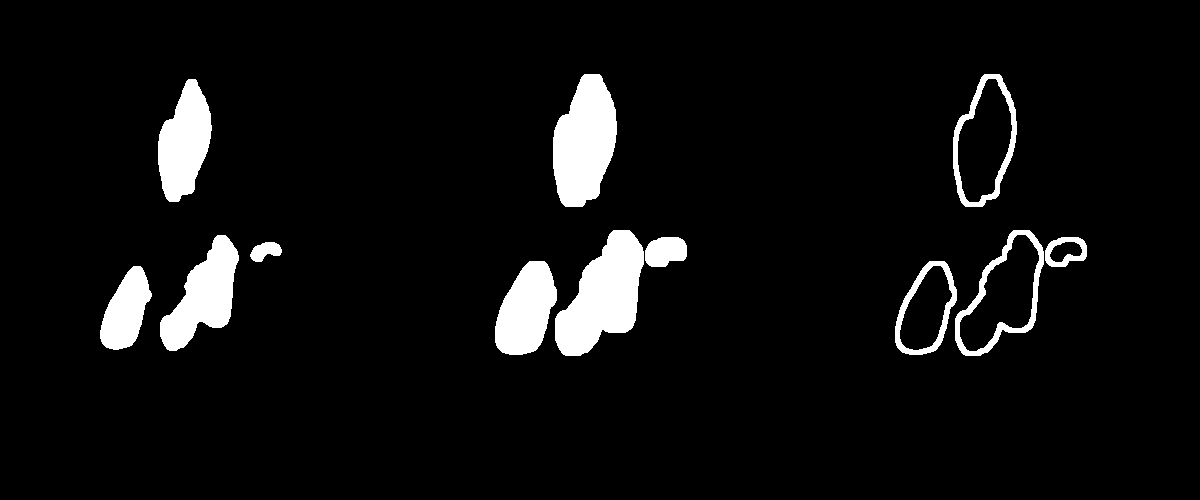

In [0]:
cv2_imshow(np.hstack([sure_fg, sure_bg, unknown]))

In [0]:
markers = cv2.watershed(image,markers)
image[markers == -1] = [255,0,0]

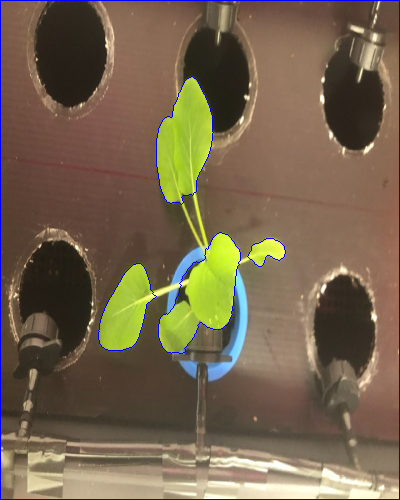

In [0]:
cv2_imshow(image)


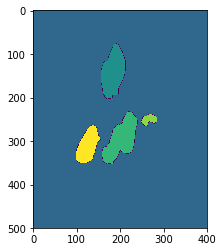

In [0]:
plt.imshow(markers)

In [0]:
 print(np.amax(markers) - 1)

11


In [0]:
o = cv2.bitwise_and(image, markers, mask = None)
cv2_imshow(o)


error: ignored